In [1]:
import numpy as np
import matplotlib.pyplot as plt 

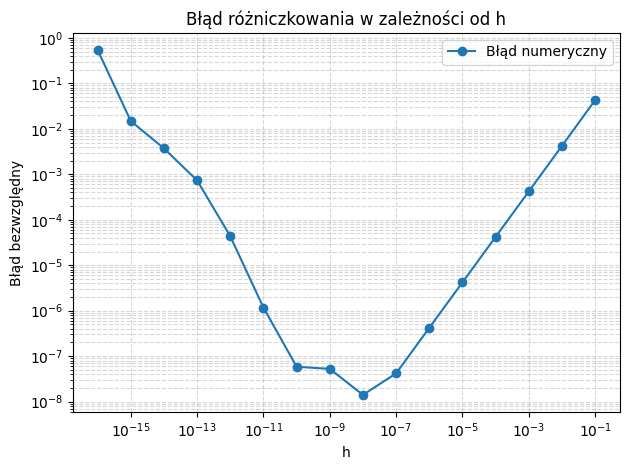

In [3]:
h = 10.0 ** (-np.arange(1, 17))
dfdx = np.zeros(len(h))
error = np.zeros(len(h))
for i in range(len(h)):
    dfdx[i] = (np.sin(1+h[i]) - np.sin(1))/h[i]
    error[i] = np.abs(dfdx[i] - np.cos(1))

plt.loglog(h, error, 'o-', label='Błąd numeryczny')
plt.xlabel('h')
plt.ylabel('Błąd bezwzględny')
plt.title('Błąd różniczkowania w zależności od h')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.legend()
#plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()

In [5]:
N = int(1e6)
S1 = 0.
SN = 0.
for i in range(N):
    S1 = S1 + 1/(i+1)
    SN = SN + 1/(N-i)

print("suma od 1 do N: ", S1)
print("suma od N do 1: ", SN)

suma od 1 do N:  14.392726722864989
suma od N do 1:  14.392726722865772


n =      4, końcowy wektor = [ 1.0000000e+00 -2.4492936e-16], błąd = 2.449e-16
n =     10, końcowy wektor = [1. 0.], błąd = 0.000e+00
n =    100, końcowy wektor = [1.00000000e+00 3.46944695e-16], błąd = 4.119e-16
n =   1000, końcowy wektor = [ 1.00000000e+00 -1.04690562e-15], błąd = 1.414e-14
n =  10000, końcowy wektor = [1.000000e+00 6.585444e-16], błąd = 4.186e-13
n = 100000, końcowy wektor = [1.00000000e+00 4.78309341e-16], błąd = 3.587e-12


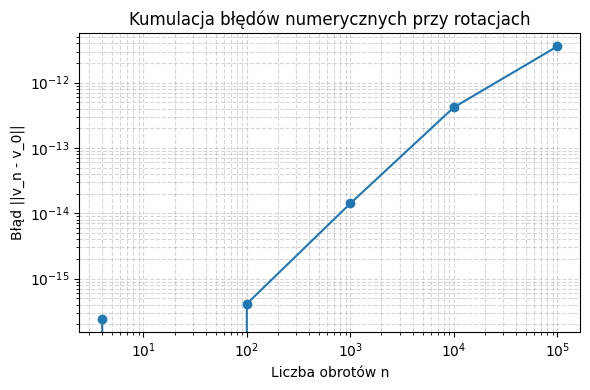

In [2]:
def rotate_vector(v0, n):
    """
    Obraca wektor v0 n razy o kąt 2π/n.
    Zwraca wektor końcowy.
    """
    theta = 2 * np.pi / n
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta),  np.cos(theta)]])
    v = v0.copy()
    for _ in range(n):
        v = R @ v
    return v

v0 = np.array([1.0, 0.0])
n_values = [4, 10, 100, 1000, 10000, 100000]
errors = []
endpoints = []

for n in n_values:
    v_end = rotate_vector(v0, n)
    endpoints.append(v_end)
    err = np.linalg.norm(v_end - v0)   # norma euklidesowa błędu
    errors.append(err)
    print(f"n = {n:>6}, końcowy wektor = {v_end}, błąd = {err:.3e}")


plt.figure(figsize=(6,4))
plt.loglog(n_values, errors, 'o-')
plt.xlabel('Liczba obrotów n')
plt.ylabel('Błąd ||v_n - v_0||')
plt.title('Kumulacja błędów numerycznych przy rotacjach')
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()
